In [108]:
import math
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [109]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [110]:
yf.pdr_override()


In [111]:
df = pdr.get_data_yahoo('AAPL', start='2012-09-01', end='2023-11-03')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-04,23.777143,24.112143,23.732143,24.106071,20.548998,367892000
2012-09-05,24.127501,24.155357,23.914286,23.936787,20.404692,336375200
2012-09-06,24.041786,24.224644,23.957144,24.152500,20.588581,391196400
2012-09-07,24.216070,24.374287,24.134644,24.301430,20.715528,329666400
2012-09-10,24.301786,24.403214,23.646429,23.669287,20.176661,487998000
...,...,...,...,...,...,...
2023-10-27,166.910004,168.960007,166.830002,168.220001,168.220001,58499100
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000


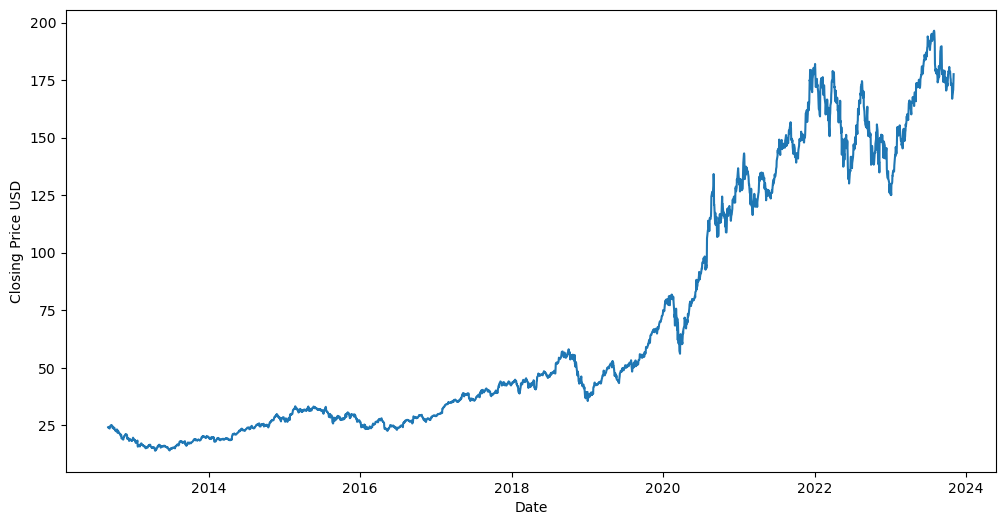

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price USD')
plt.show()


In [113]:
data = df.filter(['Close'])
dataset = data.values

In [114]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


In [115]:
training_data_len = math.ceil(len(dataset) * 0.8)


In [116]:
train_data = scaled_data[:training_data_len]

In [117]:
x_train = []
y_train = []

In [118]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


In [119]:
x_train = np.array(x_train)
y_train = np.array(y_train)


In [120]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [121]:
model = Sequential()
model.add(Dense(64, input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [122]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [123]:
model.fit(x_train, y_train, batch_size=100, epochs=400)


Epoch 1/400
22/22 [==============================] - 1s 2ms/step - loss: 0.0378
Epoch 2/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 3/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 4/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 5/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 6/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 7/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 8/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 9/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 10/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 11/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 12/400
22/22 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 13/400
22/22 [=================

22/22 [==============================] - 0s 2ms/step - loss: 6.5453e-04
Epoch 100/400
22/22 [==============================] - 0s 2ms/step - loss: 7.9190e-04
Epoch 101/400
22/22 [==============================] - 0s 2ms/step - loss: 7.6626e-04
Epoch 102/400
22/22 [==============================] - 0s 2ms/step - loss: 7.4297e-04
Epoch 103/400
22/22 [==============================] - 0s 2ms/step - loss: 6.8138e-04
Epoch 104/400
22/22 [==============================] - 0s 2ms/step - loss: 6.8403e-04
Epoch 105/400
22/22 [==============================] - 0s 3ms/step - loss: 7.3871e-04
Epoch 106/400
22/22 [==============================] - 0s 3ms/step - loss: 6.5298e-04
Epoch 107/400
22/22 [==============================] - 0s 2ms/step - loss: 7.1019e-04
Epoch 108/400
22/22 [==============================] - 0s 2ms/step - loss: 7.8342e-04
Epoch 109/400
22/22 [==============================] - 0s 2ms/step - loss: 8.6455e-04
Epoch 110/400
22/22 [==============================] - 0s 2ms/step -

22/22 [==============================] - 0s 2ms/step - loss: 7.1138e-04
Epoch 195/400
22/22 [==============================] - 0s 2ms/step - loss: 6.9191e-04
Epoch 196/400
22/22 [==============================] - 0s 2ms/step - loss: 7.2784e-04
Epoch 197/400
22/22 [==============================] - 0s 2ms/step - loss: 7.4571e-04
Epoch 198/400
22/22 [==============================] - 0s 2ms/step - loss: 6.4412e-04
Epoch 199/400
22/22 [==============================] - 0s 2ms/step - loss: 6.1683e-04
Epoch 200/400
22/22 [==============================] - 0s 2ms/step - loss: 5.7854e-04
Epoch 201/400
22/22 [==============================] - 0s 2ms/step - loss: 6.3121e-04
Epoch 202/400
22/22 [==============================] - 0s 2ms/step - loss: 6.4869e-04
Epoch 203/400
22/22 [==============================] - 0s 2ms/step - loss: 6.4558e-04
Epoch 204/400
22/22 [==============================] - 0s 2ms/step - loss: 5.3788e-04
Epoch 205/400
22/22 [==============================] - 0s 2ms/step -

22/22 [==============================] - 0s 2ms/step - loss: 4.7657e-04
Epoch 290/400
22/22 [==============================] - 0s 2ms/step - loss: 5.4631e-04
Epoch 291/400
22/22 [==============================] - 0s 2ms/step - loss: 6.7445e-04
Epoch 292/400
22/22 [==============================] - 0s 2ms/step - loss: 4.8450e-04
Epoch 293/400
22/22 [==============================] - 0s 2ms/step - loss: 5.5544e-04
Epoch 294/400
22/22 [==============================] - 0s 2ms/step - loss: 4.8196e-04
Epoch 295/400
22/22 [==============================] - 0s 2ms/step - loss: 5.5188e-04
Epoch 296/400
22/22 [==============================] - 0s 2ms/step - loss: 6.2265e-04
Epoch 297/400
22/22 [==============================] - 0s 2ms/step - loss: 5.8108e-04
Epoch 298/400
22/22 [==============================] - 0s 2ms/step - loss: 5.6942e-04
Epoch 299/400
22/22 [==============================] - 0s 2ms/step - loss: 4.9654e-04
Epoch 300/400
22/22 [==============================] - 0s 2ms/step -

22/22 [==============================] - 0s 2ms/step - loss: 5.2128e-04
Epoch 385/400
22/22 [==============================] - 0s 2ms/step - loss: 5.3674e-04
Epoch 386/400
22/22 [==============================] - 0s 2ms/step - loss: 4.7645e-04
Epoch 387/400
22/22 [==============================] - 0s 2ms/step - loss: 5.8871e-04
Epoch 388/400
22/22 [==============================] - 0s 2ms/step - loss: 6.2418e-04
Epoch 389/400
22/22 [==============================] - 0s 2ms/step - loss: 6.1409e-04
Epoch 390/400
22/22 [==============================] - 0s 2ms/step - loss: 5.2210e-04
Epoch 391/400
22/22 [==============================] - 0s 2ms/step - loss: 5.3242e-04
Epoch 392/400
22/22 [==============================] - 0s 2ms/step - loss: 6.1174e-04
Epoch 393/400
22/22 [==============================] - 0s 2ms/step - loss: 4.7270e-04
Epoch 394/400
22/22 [==============================] - 0s 2ms/step - loss: 5.1577e-04
Epoch 395/400
22/22 [==============================] - 0s 2ms/step -

In [124]:
model.save('future_fnn_model.h5')

In [125]:
test_data = scaled_data[training_data_len - 60:, :]

In [126]:
x_test = []
y_test = dataset[training_data_len:, :]


In [127]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [128]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [129]:
predictions = model.predict(x_test)

18/18 [==============================] - 0s 2ms/step


In [130]:
predictions = scaler.inverse_transform(predictions)


In [131]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.6585893094095203


In [132]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Admin\AppData\Local\Temp\ipykernel_9844\2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


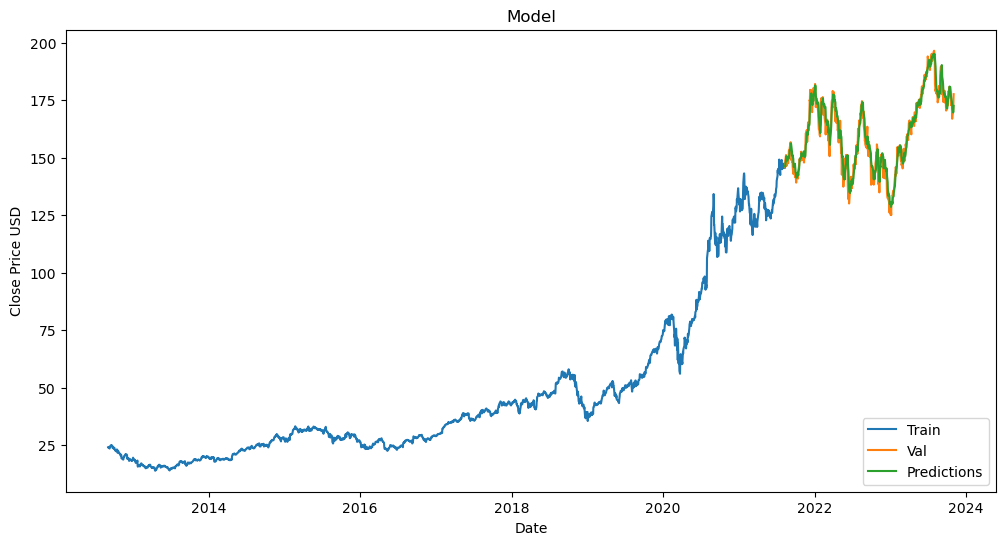

In [133]:
plt.figure(figsize=(12, 6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [134]:
seed_sequence = x_test[-1]

# Specify the number of future predictions
n_future_predictions = 5
future_predictions = []


In [135]:
for _ in range(n_future_predictions):
    next_value = model.predict(np.array([seed_sequence]))[0][0]
    future_predictions.append(next_value)
    
    # Update the seed_sequence by removing the oldest value and adding the predicted value
    seed_sequence = np.append(seed_sequence[1:], next_value)

1/1 [==============================] - 0s 18ms/step


In [136]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [137]:
future_dates = pd.date_range(start=df.index[-1], periods=n_future_predictions+1, closed='right')
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predictions'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9844\1515032649.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=df.index[-1], periods=n_future_predictions+1, closed='right')


In [138]:
combined_df = pd.concat([valid, future_df])

In [139]:
print(combined_df)

                 Close  Predictions
2021-08-11  145.860001   146.158752
2021-08-12  148.889999   145.979767
2021-08-13  149.100006   147.525894
2021-08-16  151.119995   148.541504
2021-08-17  150.190002   150.004181
...                ...          ...
2023-11-03         NaN   172.493225
2023-11-04         NaN   173.075424
2023-11-05         NaN   173.326630
2023-11-06         NaN   174.208511
2023-11-07         NaN   174.867401

[567 rows x 2 columns]


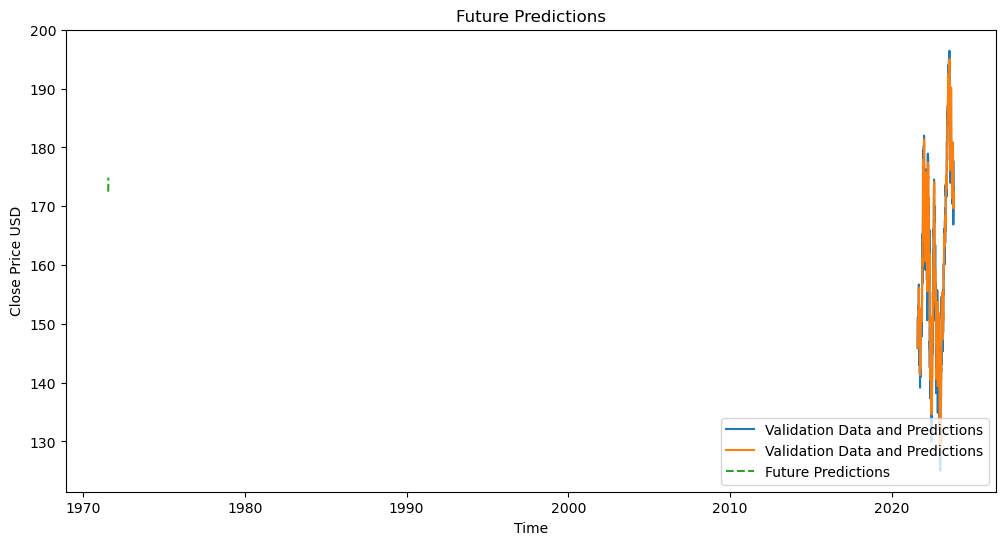

In [140]:
plt.figure(figsize=(12, 6))
plt.title('Future Predictions')
plt.xlabel('Time')
plt.ylabel('Close Price USD')
plt.plot(valid[['Close', 'Predictions']], label='Validation Data and Predictions')
plt.plot(range(len(valid), len(valid) + n_future_predictions), future_predictions, label='Future Predictions', linestyle='--')
plt.legend(loc='lower right')
plt.show()
